In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt
import mplfinance as mpf

import time

import os
from os import listdir
from os.path import isfile, join

In [3]:
# Default Values
PATH = "F:/Code/Python/Jupyter/Finance/datasets/Stock List/"
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

In [4]:
# Get Stock File Names in a List
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]

tickers.sort()
tickers

['A',
 'AA',
 'AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'ABBV',
 'ABC',
 'ABCB',
 'ABEO',
 'ABG',
 'ABIO',
 'ABM',
 'ABMD',
 'ABR',
 'ABT',
 'ABTX',
 'AC',
 'ACA',
 'ACAD',
 'ACBI',
 'ACC',
 'ACCO',
 'ACER',
 'ACGL',
 'ACHC',
 'ACHV',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMR',
 'ACN',
 'ACNB',
 'ACOR',
 'ACRE',
 'ACRS',
 'ACRX',
 'ACTG',
 'ACU',
 'ACY',
 'ADBE',
 'ADC',
 'ADES',
 'ADI',
 'ADM',
 'ADMA',
 'ADMP',
 'ADNT',
 'ADP',
 'ADS',
 'ADSK',
 'ADT',
 'ADTN',
 'ADUS',
 'ADVM',
 'ADXS',
 'AE',
 'AEE',
 'AEHR',
 'AEIS',
 'AEL',
 'AEMD',
 'AEO',
 'AEP',
 'AERI',
 'AES',
 'AEY',
 'AFG',
 'AFI',
 'AFL',
 'AGCO',
 'AGE',
 'AGEN',
 'AGFS',
 'AGIO',
 'AGLE',
 'AGM',
 'AGNC',
 'AGO',
 'AGR',
 'AGRX',
 'AGS',
 'AGTC',
 'AGX',
 'AGYS',
 'AHH',
 'AHT',
 'AIG',
 'AIMC',
 'AIN',
 'AINC',
 'AIR',
 'AIRG',
 'AIRI',
 'AIRT',
 'AIT',
 'AIV',
 'AIZ',
 'AJG',
 'AJRD',
 'AJX',
 'AKAM',
 'AKBA',
 'AKR',
 'AKTS',
 'AL',
 'ALB',
 'ALBO',
 'ALCO',
 'ALDX',
 'ALE',
 'ALEC',
 'ALEX',
 'ALG'

In [5]:
# Function that returns a dataframe from a csv
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + ".csv")
    except FileNotFoundError:
        print("File doesn't exist")
    else:
        return df

In [6]:
# Function that saves dataframe to csv
def save_dataframe_to_csv(df, ticker):
    df.to_csv(PATH + ticker + ".csv")

In [7]:
# Return valid dates in dataframe
def get_valid_dates(df, sdate, edate):
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate)
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
        
        # Convert date string to add leading zeros
        date_leading = '-'.join(('0' if len(x) < 2 else '')+ x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x) < 2 else '')+ x for x in last_date.split('-'))
    except Exception:
        print("Date is corrupted")
    else:
        return date_leading, date_ending
        

In [8]:
# Returns return on investment over specific time
def roi_between_dates(df, sdate, edate):
    try:
        start_val = df.loc[sdate, 'Adj Close']
        end_val = df.loc[edate, 'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data is corrupted")
    else:
        return roi

In [9]:
# Get mean between dates
def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    
    return df.loc[mask]['Adj Close'].mean()

In [10]:
# Get standard deviation between dates
def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    
    return df.loc[mask]['Adj Close'].std()

In [11]:
# Get coefficient of variation between dates
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    
    return sd / mean

In [12]:
# Test functions
tickers[0]
stock_a = get_df_from_csv(tickers[0])

print(get_valid_dates(stock_a, '2020-01-01', '2020-12-31'))
sdate, edate = get_valid_dates(stock_a, '2020-01-01', '2020-12-31')
print("Adj Close Mean: ", get_mean_between_dates(stock_a, sdate, edate))
print("Adj Close SD: ", get_sd_between_dates(stock_a, sdate, edate))
print("Adj Close COV: ", get_cov_between_dates(stock_a, sdate, edate))
stock_a = stock_a.set_index(['Date'])
print("Return on Investment (ROI): ", roi_between_dates(stock_a, sdate, edate))

('2020-01-02', '2020-12-31')
Adj Close Mean:  91.64646160791791
Adj Close SD:  13.77510769733431
Adj Close COV:  0.15030703265192064
Return on Investment (ROI):  0.38750017769001555


In [13]:
# COV & ROI for all stocks over defined period
def get_cov_ror(tickers, sdate, edate):
    col_names = ["Ticker", "COV", "ROI"]
    df = pd.DataFrame(columns = col_names)
    
    for ticker in tickers:
        print("Working on: ", ticker)
        s_df = get_df_from_csv(ticker)
        
        sdate2, edate2 = get_valid_dates(s_df, sdate, edate)
        
        cov = get_cov_between_dates(s_df, sdate2, edate2)
        s_df = s_df.set_index(['Date'])
        roi = roi_between_dates(s_df, sdate2, edate2)
        
        # Add data to new row
        df.loc[len(df.index)] = [ticker, cov, roi]
    
    return df

In [14]:
market_df = get_cov_ror(tickers, '2019-01-01', '2019-12-31')

Working on:  A
Working on:  AA
Working on:  AAL
Working on:  AAME
Working on:  AAOI
Working on:  AAON
Working on:  AAP
Working on:  AAPL
Working on:  AAT
Working on:  AAWW
Working on:  ABBV
Working on:  ABC
Working on:  ABCB
Working on:  ABEO
Working on:  ABG
Working on:  ABIO
Working on:  ABM
Working on:  ABMD
Working on:  ABR
Working on:  ABT
Working on:  ABTX
Working on:  AC
Working on:  ACA
Working on:  ACAD
Working on:  ACBI
Working on:  ACC
Working on:  ACCO
Working on:  ACER
Working on:  ACGL
Working on:  ACHC
Working on:  ACHV
Working on:  ACIW
Working on:  ACLS
Working on:  ACM
Working on:  ACMR
Working on:  ACN
Working on:  ACNB
Working on:  ACOR
Working on:  ACRE
Working on:  ACRS
Working on:  ACRX
Working on:  ACTG
Working on:  ACU
Working on:  ACY
Working on:  ADBE
Working on:  ADC
Working on:  ADES
Working on:  ADI
Working on:  ADM
Working on:  ADMA
Working on:  ADMP
Working on:  ADNT
Working on:  ADP
Working on:  ADS
Working on:  ADSK
Working on:  ADT
Working on:  ADTN
W

In [15]:
# Get top 5 stocks based on ROI during specified date
market_df.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,COV,ROI
302,AXSM,0.745206,37.567163
233,ARWR,0.496426,3.834604
200,APPS,0.376899,2.772487
211,ARAV,0.314364,2.755494
216,ARDX,0.434847,2.752500


In [16]:
# Merge multiple stocks in one dataframe by a specific column name
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        df['Date'] = pd.to_datetime(df['Date'])
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
    
    return mult_df

<AxesSubplot:>

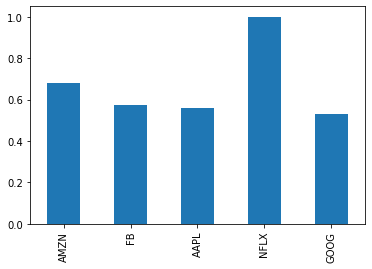

In [17]:
# Create a correlation matrix using FAANGS
# Standardized value between -1 and 1
# value > 0.5 = strongly correlated

faang_list = ["AMZN","FB", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('daily_return', '2020-1-1', '2020-12-31', *faang_list)
mult_df.corr()

# Correlation for a specific ticker
mult_df.corr()['NFLX'].plot(kind='bar')

In [18]:
# Get the variance (return fluctuation) of a stock
# variance * amount of days
mult_df['NFLX'].var() * 253
# days = len(mult_df.index)
# days

0.21435236996843451

In [19]:
# Get covariance of stocks
mult_df.cov() * 253

,AMZN,FB,AAPL,NFLX,GOOG
AMZN,0.148918,0.121090,0.125888,0.121261,0.100904
FB,0.121090,0.211498,0.165004,0.122340,0.141870
AAPL,0.125888,0.165004,0.218483,0.120969,0.135044
NFLX,0.121261,0.122340,0.120969,0.214352,0.094118
GOOG,0.100904,0.141870,0.135044,0.094118,0.147431


<h3>Portfolio Variance</h3>

In [22]:
# Simulate portfolio list
port_list = ["FB", "NEM"]
port_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *port_list)
port_df

# Correlation matrix
port_df.corr()

price_df = merge_df_by_column_name('Adj Close',  '2020-1-1', '2020-12-31', *port_list)
price_df.head()

# FB: 1 share at 209.78 
# NEM: 5 shares at 41.74 = 208.70
fb_wt = 209.78 / 418.48
nem_wt = 208.70 / 418.48
fb_wt = .5012 # .5012
nem_wt = .4988
wts = np.array([fb_wt, nem_wt])

# Variance = (transpose weights) * covarience, weights
wts.T
port_var = np.dot(wts.T, np.dot(port_df.cov() * 253, wts))
print("Portfolio Var :", port_var)
print("FB Var :", port_df["FB"].var() * 253)
print("NEM Var :", port_df["NEM"].var() * 253)

Portfolio Var : 0.12743410197850102
FB Var : 0.2114977106570751
NEM Var : 0.21334760367278885
